## **TASK-1: Prediction using supervised ML**
*   To predict the percentage of a student based on the number of study hours.
*   Dataset used - http://bit.ly/w-data

By - Shreya Kakade

In [ ]:
#Importing basic necessary libraries
import pandas as pd
import numpy as np

In [ ]:
#Reading data
data = pd.read_csv(r"http://bit.ly/w-data")

In [ ]:
data.describe()   

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.head()     #displaying first five records

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Exploratory Data Analysis**
### **Visualization**

In [ ]:
#Importing libraries required for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

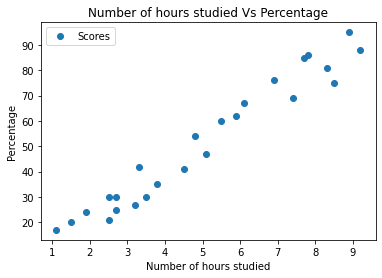

In [ ]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Number of hours studied Vs Percentage')
plt.xlabel('Number of hours studied')
plt.ylabel('Percentage')
plt.show()

From the  above plot, we can see that there is a positive linear relation between the number of hours studied and percentage.

### **Training and testing data**

In [ ]:
#importing necessary libraries for train-test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Splitting the data into dependent and independent variable
X = data.iloc[:,:-1]  #Independent variable
y = data.iloc[:, -1]   #Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=72)

In [ ]:
X_train.head()  

,Hours
4,3.5
2,3.2
1,5.1
22,3.8
11,5.9


In [ ]:
X_test.head()  

,Hours
16,2.5
6,9.2
9,2.7
3,8.5
21,4.8


In [ ]:
X_train.shape, y_train.shape

((20, 1), (20,))

In [ ]:
X_test.shape, X_test.shape

((5, 1), (5, 1))

In [ ]:
y_train.head()

4     30
2     27
1     47
22    35
11    62
Name: Scores, dtype: int64

In [ ]:
y_test.head()

16    30
6     88
9     25
3     75
21    54
Name: Scores, dtype: int64

### **Training the data**

In [ ]:
#Applying the Linear Regression Model
lr = LinearRegression() 
#training the model on train dataset
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_    # (Equation of line)y = mx + c

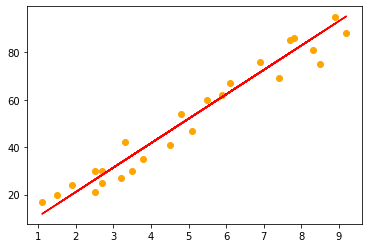

In [ ]:
# Plotting for the test data
plt.scatter(X, y, color = 'orange')
plt.plot(X, line, color = 'red');
plt.show()

### **Model Evaluation**

In [ ]:
print(X_test) 
y_pred = lr.predict(X_test) # Predicting the scores

    Hours
16    2.5
6     9.2
9     2.7
3     8.5
21    4.8


In [ ]:
# Comparing the actual values with predicted values
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred 

,Actual,Predicted
16,30,26.272396
6,88,95.179937
9,25,28.329337
3,75,87.980642
21,54,49.927223


In [ ]:
train_acc_lr = round(lr.score(X_train, y_train)*100, 2)
print('Training Accuracy : ', train_acc_lr)

Training Accuracy :  95.85


In [ ]:
test_acc_lr = round(lr.score(X_test, y_test)*100, 2)
print('Testing Accuracy : ', test_acc_lr)

Testing Accuracy :  91.32


In [ ]:
#importing necessary libraries
from sklearn import metrics  
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred = lr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error: 6.2580595298008515
Mean Squared Error: 52.32311982821172
Variance score: 0.91


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print('When a student studies 9.25 hours per day, the expected score is :', lr.predict([[9.25]]),'%')

When a student studies 9.25 hours per day, the expected score is : [95.69417284] %
